In [159]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [160]:
df=pd.read_csv('Train.csv')


In [161]:
df.shape

(1600, 6)

In [162]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values
X=(X - X.mean())/X.std()
Y=(Y-Y.mean())/Y.std()

In [163]:
print(X.shape)
print(Y.shape)

(1600, 5)
(1600,)


In [164]:
ones=np.ones((X.shape[0],1))
X_=np.hstack((ones,X))

In [165]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,Y,theta):
    m=X.shape[0]
    y_= hypothesis(X,theta)   
    return np.sum((Y - y_)**2)/m
    
def gradient(X,y,theta):
    m=X.shape[0]
    y_= hypothesis(X,theta)
    grad=np.dot(X.T,(y_- y))
    return grad/m 

def gradentDescent(X,Y,lr=0.1,max_steps=100):
    n=X.shape[1]
    theta = np.zeros((n,))
    errorlist=[]
    for i in range(max_steps):
        grad= gradient(X,Y,theta)
        errorlist.append(error(X,Y,theta))
        theta = theta - lr*grad

    return theta,errorlist

In [166]:
def batch_gradient_descent(X,y,batch_size=200,max_steps=10,lr=0.1):
    n=X.shape[1]
    theta = np.zeros((n,))
    errorlist=[]
    
    data=np.hstack((X,y.reshape(-1,1)))
    for i in range(max_steps):
        # Mini batch
        np.random.shuffle(data)
        m=data.shape[0]
        total_batches = m//batch_size
        for i in range(total_batches):
            batch_data = data[i*batch_size :(i+1)*batch_size ,:]
            x_batch = batch_data[:,:-1]
            y_batch = batch_data[:,-1]
            batch_gradient = gradient(x_batch,y_batch,theta)
            theta = theta - lr*batch_gradient
            errorlist.append(error(x_batch,y_batch,theta))
    
    return theta , errorlist
    

In [167]:
t,e=gradentDescent(X_,Y)

In [168]:
t1,e1=batch_gradient_descent(X_,Y)
np.array(t1).shape

(6,)

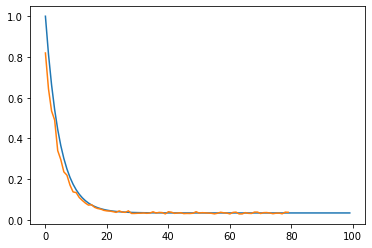

In [169]:
plt.plot(e)
plt.plot(e1)

In [170]:
y_=hypothesis(X_,t)

In [171]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y-y.mean())**2)
    score = (1 - num/denom)
    return score

In [172]:
r2_score(Y,y_)

0.9660939659059462